<a href="https://colab.research.google.com/github/2100877953/work/blob/main/BasicVSR%2B%2B_Inference_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference Demo of BasicVSR++ (CVPR 2022)
This is a quick inference demo of our paper ["BasicVSR++: Improving Video Super-Resolution with Enhanced Propagation and Alignment"](https://arxiv.org/abs/2104.13371). Through effective propagation and alignment, our BasicVSR++ obtains promising performance in various tasks, including **super-resolution**, **deblurring**, **denoising**, and **compressed video enhancement**. 

<!-- Here is an over

<img src="https://user-images.githubusercontent.com/7676947/144365675-5c558a89-8b7f-4af9-a696-228bc73ab56e.png" width="100%"> -->


## 1. Preparation

First, please make sure that you have **enabled GPU** in `Runtime->Change runtime type`. Then we will 
1. install dependencies, and
2. clone the BasicVSR++ repository.

In [ ]:
# Install dependencies
!pip install openmim
!mim install mmcv-full

# clone BasicVSR++ and download the pre-trained weights for this demo. For other checkpoints, please refer to https://github.com/ckkelvinchan/BasicVSR_PlusPlus/blob/master/README.md
!git clone https://github.com/ckkelvinchan/BasicVSR_PlusPlus.git
%cd BasicVSR_PlusPlus
!pip install -v -e .
!mkdir chkpts
!wget https://download.openmmlab.com/mmediting/restorers/basicvsr_plusplus/basicvsr_plusplus_c64n7_8x1_600k_reds4_20210217-db622b2f.pth -O chkpts/basicvsr_plusplus_reds4.pth

  Created wheel for openmim: filename=openmim-0.1.5-py2.py3-none-any.whl size=42503 sha256=e4e69d012a6ab53680d75b91847593ac63dfc7dfdd50885710a3bb33107465e8
  Stored in directory: /root/.cache/pip/wheels/16/8b/e1/bdebbbc687aa50224a5ce46fe97a040a0c59f92b34bfc750b6
Successfully built openmim
installing mmcv-full from wheel.
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 45.7 MB 24 kB/s 
     |████████████████████████████████| 190 kB 5.1 MB/s 
Cloning into 'BasicVSR_PlusPlus'...
remote: Enumerating objects: 444, done.
remote: Counting objects: 100% (444/444), done.
remote: Compressing objects: 100% (384/384), done.
remote: Total 444 (delta 42), reused 414 (delta 33), pack-reused 0
Receiving objects: 100% (444/444), 4.30 MiB | 17.56 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/BasicVSR_PlusPlus
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib 

## 2. Inference with Images as Inputs

BasicVSR++ supports multiple tasks. You can try **super-resolution**, **deblurring**, **denoising**, and **compressed video enhancement** by specifying different configuration files and different checkpoints. Below is an example to run the script. You may need to change the file path to process your own video. More checkpoints and configs can be found in [MMEditing](https://github.com/open-mmlab/mmediting/tree/master/configs/restorers/basicvsr_plusplus).

2022-04-18 03:50:29,285 - mmedit - INFO - load checkpoint from http path: https://download.openmmlab.com/mmediting/restorers/basicvsr/spynet_20210409-c6c1bd09.pth
Downloading: "https://download.openmmlab.com/mmediting/restorers/basicvsr/spynet_20210409-c6c1bd09.pth" to /root/.cache/torch/hub/checkpoints/spynet_20210409-c6c1bd09.pth
100% 5.50M/5.50M [00:00<00:00, 8.75MB/s]
load checkpoint from local path: chkpts/basicvsr_plusplus_reds4.pth
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


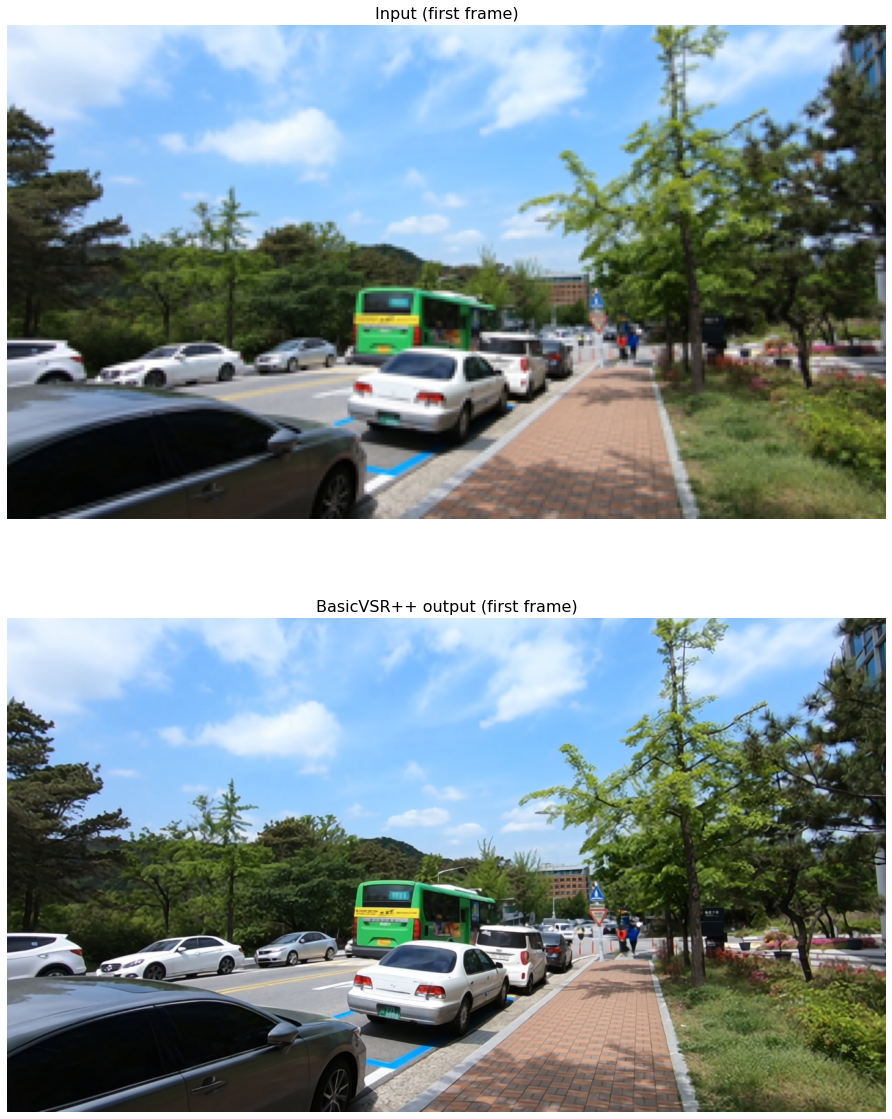

In [ ]:
# compute the results given 1) configuration file, 2) checkpoint, 3) input directory, and 4) output directory (it may take a while to run)
# change [data/demo_000] and [results/demo_000] to the input and output paths of your video
!python demo/restoration_video_demo.py configs/basicvsr_plusplus_reds4.py chkpts/basicvsr_plusplus_reds4.pth data/demo_000 results/demo_000

# show the first image as an example
import mmcv
import matplotlib.pyplot as plt

img_input = mmcv.imread('data/demo_000/00000000.png', channel_order='rgb') 
img_output = mmcv.imread('results/demo_000/00000000.png', channel_order='rgb') 

fig = plt.figure(figsize=(25, 20))
ax1 = fig.add_subplot(2, 1, 1) 
plt.title('Input (first frame)', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(2, 1, 2)
plt.title('BasicVSR++ output (first frame)', fontsize=16)
ax2.axis('off')
ax1.imshow(img_input)
ax2.imshow(img_output)
